**Interactive mapping and analysis of geospatial big data using geemap and Google Earth Engine**

This notebook was developed for the geemap workshop at the [GeoPython 2021 Conference](https://2021.geopython.net).

Authors: [Qiusheng Wu](https://github.com/giswqs), [Kel Markert](https://github.com/KMarkert)

Link to this notebook: https://gishub.org/geopython

Recorded video: https://www.youtube.com/watch?v=wGjpjh9IQ5I

[![geemap workship](https://img.youtube.com/vi/wGjpjh9IQ5I/0.jpg)](https://www.youtube.com/watch?v=wGjpjh9IQ5I)


## Introduction

### Description

Google Earth Engine (GEE) is a cloud computing platform with a multi-petabyte catalog of satellite imagery and geospatial datasets. It enables scientists, researchers, and developers to analyze and visualize changes on the Earth’s surface. The geemap Python package provides GEE users with an intuitive interface to manipulate, analyze, and visualize geospatial big data interactively in a Jupyter-based environment. The topics will be covered in this workshop include: 

1. Introducing geemap and the Earth Engine Python API
2. Creating interactive maps
3. Searching GEE data catalog
4. Displaying GEE datasets
5. Classifying images using machine learning algorithms
6. Computing statistics and exporting results 
7. Producing publication-quality maps
8. Building and deploying interactive web apps, among others

This workshop is intended for scientific programmers, data scientists, geospatial analysts, and concerned citizens of Earth. The attendees are expected to have a basic understanding of Python and the Jupyter ecosystem. Familiarity with Earth science and geospatial datasets is useful but not required.

### Useful links
- [GeoPython 2021 Conference webiste](https://2021.geopython.net)
- [Google Earth Engine](https://earthengine.google.com)
- [geemap.org](https://geemap.org)
- [Google Earth Engine and geemap Python Tutorials](https://www.youtube.com/playlist?list=PLAxJ4-o7ZoPccOFv1dCwvGI6TYnirRTg3) (55 videos with a total length of 15 hours)
- [Spatial Data Management with Google Earth Engine](https://www.youtube.com/playlist?list=PLAxJ4-o7ZoPdz9LHIJIxHlZe3t-MRCn61) (19 videos with a total length of 9 hours)
- [Ask geemap questions on GitHub](https://github.com/giswqs/geemap/discussions)

### Prerequisite
- A Google Earth Engine account. Sigh up [here](https://earthengine.google.com) if needed. 
- [Miniconda](https://docs.conda.io/en/latest/miniconda.html) or [Anaconda](https://www.anaconda.com/products/individual)


### Set up a conda environment

```
conda create -n geo python=3.8
conda activate geo
conda install geemap -c conda-forge
conda install jupyter_contrib_nbextensions -c conda-forge
jupyter contrib nbextension install --user
```


In [ ]:
#conda create -n carto python=3.8
#conda activate carto
#conda install mamba -c conda-forge
#mamba install cartopy scipy -c conda-forge
#mamba install geemap -c conda-forge
#jupyter notebook

## geemap basics

### Import libraries

In [5]:
import os
import ee
import geemap

In [ ]:
#comment out geemap update once you run it and restart the kernel

In [9]:
#geemap.update_package()

Unzipping geemap-master.zip ...
Data downloaded to: /Users/bonnymcclain/Downloads/geemap-master

Please comment out 'geemap.update_package()' and restart the kernel to take effect:
Jupyter menu -> Kernel -> Restart & Clear Output


### Create an interactive map

In [6]:
Map = geemap.Map() 
Map

Map(center=[40, -100], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children=(T…

In [ ]:
### Customize the default map

You can specify the center(lat, lon) and zoom for the default map. The lite mode will only show the zoom in/out tool. 

In [ ]:
#lite mode is a simpler map

In [3]:
Map = geemap.Map(center=(40, -100), zoom=4, lite_mode=True) 
Map

Map(center=[40, -100], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_t…

### Add basemaps

In [4]:
Map = geemap.Map()
Map.add_basemap('HYBRID')
Map

Map(center=[40, -100], controls=(WidgetControl(options=['position'], widget=HBox(children=(ToggleButton(value=…

In [9]:
from geemap.basemaps import basemaps

In [ ]:
#Map.add_basemap(basemaps.)hit tab for avail basemaps

In [12]:
Map.add_basemap(basemaps.Google_Terrain)

In [13]:
Map.add_basemap(basemaps.OpenTopoMap)

In [14]:
Map(basemaps.OpenTopoMap)

TypeError: 'Map' object is not callable

### Change basemaps without coding

![](https://i.imgur.com/PXURCSP.png)

In [15]:
Map = geemap.Map()
Map

Map(center=[40, -100], controls=(WidgetControl(options=['position'], widget=HBox(children=(ToggleButton(value=…

### Add WMS and XYZ tile layers

Examples: https://viewer.nationalmap.gov/services/


In [ ]:
#copy wms link from link above to change map

In [17]:
Map = geemap.Map()

url = 'https://mt1.google.com/vt/lyrs=p&x={x}&y={y}&z={z}'
Map.add_tile_layer(url, name='Google Terrain', attribution='Google')
Map

Map(center=[40, -100], controls=(WidgetControl(options=['position'], widget=HBox(children=(ToggleButton(value=…

In [18]:
naip_url = 'https://basemap.nationalmap.gov:443/arcgis/services/USGSTopo/MapServer/WmsServer?'
Map.add_wms_layer(url=naip_url, layers='0', name='NAIP Imagery', format='image/png', shown=True)

### Use drawing tools

In [ ]:
Map = geemap.Map()
Map

In [ ]:
#select polygon on map
#Map.user_roi
#need .getinfo to get useful info

In [ ]:
Map.user_roi.getInfo()

In [ ]:
#if more than more than 1 drawn polygon
Map.user_rois.getInfo()

### Convert GEE JavaScript to Python

https://developers.google.com/earth-engine/guides/image_visualization

In [ ]:
js_snippet = """
// Load an image.
var image = ee.Image('LANDSAT/LC08/C01/T1_TOA/LC08_044034_20140318');

// Define the visualization parameters.
var vizParams = {
  bands: ['B5', 'B4', 'B3'],
  min: 0,
  max: 0.5,
  gamma: [0.95, 1.1, 1]
};

// Center the map and display the image.
Map.setCenter(-122.1899, 37.5010, 10); // San Francisco Bay
Map.addLayer(image, vizParams, 'false color composite');

"""

In [20]:
geemap.js_snippet_to_py(js_snippet, add_new_cell=True, import_ee=True, import_geemap=True, show_map=True)

NameError: name 'js_snippet' is not defined

You can also convert GEE JavaScript to Python without coding.

![](https://i.imgur.com/VnnrJwe.png)

In [23]:
Map = geemap.Map()
Map

Map(center=[40, -100], controls=(WidgetControl(options=['position'], widget=HBox(children=(ToggleButton(value=…

In [24]:
dataset = ee.ImageCollection('MODIS/006/MCD12Q1')
igbpLandCover = dataset.select('LC_Type1')
igbpLandCoverVis = {
  'min': 1.0,
  'max': 17.0,
  'palette': [
    '05450a', '086a10', '54a708', '78d203', '009900', 'c6b044', 'dcd159',
    'dade48', 'fbff13', 'b6ff05', '27ff87', 'c24f44', 'a5a5a5', 'ff6d4c',
    '69fff8', 'f9ffa4', '1c0dff'
  ],
}
Map.setCenter(6.746, 46.529, 6)
Map.addLayer(igbpLandCover, igbpLandCoverVis, 'IGBP Land Cover')


In [ ]:
dataset = ee.ImageCollection('MODIS/006/MCD12Q1')
igbpLandCover = dataset.select('LC_Type1')
igbpLandCoverVis = {
  'min': 1.0,
  'max': 17.0,
  'palette': [
    '05450a', '086a10', '54a708', '78d203', '009900', 'c6b044', 'dcd159',
    'dade48', 'fbff13', 'b6ff05', '27ff87', 'c24f44', 'a5a5a5', 'ff6d4c',
    '69fff8', 'f9ffa4', '1c0dff'
  ],
}
Map.setCenter(6.746, 46.529, 6)
Map.addLayer(igbpLandCover, igbpLandCoverVis, 'IGBP Land Cover')


In [ ]:
dataset = ee.ImageCollection('MODIS/006/MCD12Q1')
igbpLandCover = dataset.select('LC_Type1')
igbpLandCoverVis = {
  'min': 1.0,
  'max': 17.0,
  'palette': [
    '05450a', '086a10', '54a708', '78d203', '009900', 'c6b044', 'dcd159',
    'dade48', 'fbff13', 'b6ff05', '27ff87', 'c24f44', 'a5a5a5', 'ff6d4c',
    '69fff8', 'f9ffa4', '1c0dff'
  ],
}
Map.setCenter(6.746, 46.529, 6)
Map.addLayer(igbpLandCover, igbpLandCoverVis, 'IGBP Land Cover')


In [ ]:
dataset = ee.ImageCollection('MODIS/006/MCD12Q1')
igbpLandCover = dataset.select('LC_Type1')
igbpLandCoverVis = {
  'min': 1.0,
  'max': 17.0,
  'palette': [
    '05450a', '086a10', '54a708', '78d203', '009900', 'c6b044', 'dcd159',
    'dade48', 'fbff13', 'b6ff05', '27ff87', 'c24f44', 'a5a5a5', 'ff6d4c',
    '69fff8', 'f9ffa4', '1c0dff'
  ],
}
Map.setCenter(6.746, 46.529, 6)
Map.addLayer(igbpLandCover, igbpLandCoverVis, 'IGBP Land Cover')


In [ ]:
dataset = ee.ImageCollection('MODIS/006/MCD12Q1')
igbpLandCover = dataset.select('LC_Type1')
igbpLandCoverVis = {
  'min': 1.0,
  'max': 17.0,
  'palette': [
    '05450a', '086a10', '54a708', '78d203', '009900', 'c6b044', 'dcd159',
    'dade48', 'fbff13', 'b6ff05', '27ff87', 'c24f44', 'a5a5a5', 'ff6d4c',
    '69fff8', 'f9ffa4', '1c0dff'
  ],
}
Map.setCenter(6.746, 46.529, 6)
Map.addLayer(igbpLandCover, igbpLandCoverVis, 'IGBP Land Cover')


In [ ]:
dataset = ee.ImageCollection('MODIS/006/MCD12Q1')
igbpLandCover = dataset.select('LC_Type1')
igbpLandCoverVis = {
  'min': 1.0,
  'max': 17.0,
  'palette': [
    '05450a', '086a10', '54a708', '78d203', '009900', 'c6b044', 'dcd159',
    'dade48', 'fbff13', 'b6ff05', '27ff87', 'c24f44', 'a5a5a5', 'ff6d4c',
    '69fff8', 'f9ffa4', '1c0dff'
  ],
}
Map.setCenter(6.746, 46.529, 6)
Map.addLayer(igbpLandCover, igbpLandCoverVis, 'IGBP Land Cover')


## Earth Engine datasets

### Load Earth Engine datasets

In [19]:
Map = geemap.Map()

# Add Earth Engine datasets
dem = ee.Image('USGS/SRTMGL1_003')
landcover = ee.Image("ESA/GLOBCOVER_L4_200901_200912_V2_3").select('landcover')
landsat7 = ee.Image('LE7_TOA_5YEAR/1999_2003')
states = ee.FeatureCollection("TIGER/2018/States")

# Set visualization parameters.
vis_params = {
  'min': 0,
  'max': 4000,
  'palette': ['006633', 'E5FFCC', '662A00', 'D8D8D8', 'F5F5F5']}

# Add Earth Eninge layers to Map
Map.addLayer(dem, vis_params, 'SRTM DEM', True, 0.5)
Map.addLayer(landcover, {}, 'Land cover')
Map.addLayer(landsat7, {'bands': ['B4', 'B3', 'B2'], 'min': 20, 'max': 200, 'gamma': 1.5}, 'Landsat 7')
Map.addLayer(states, {}, "US States")

Map

Map(center=[40, -100], controls=(WidgetControl(options=['position'], widget=HBox(children=(ToggleButton(value=…

### Search the Earth Engine Data Catalog

In [ ]:
Map = geemap.Map()
Map

In [ ]:
dem = ee.Image('CGIAR/SRTM90_V4')
Map.addLayer(dem, {}, "CGIAR/SRTM90_V4")

In [ ]:
vis_params = {
  'min': 0,
  'max': 4000,
  'palette': ['006633', 'E5FFCC', '662A00', 'D8D8D8', 'F5F5F5']}

Map.addLayer(dem, vis_params, "DEM")

### Use the datasets module

In [ ]:
from geemap.datasets import DATA

In [ ]:
Map = geemap.Map()

dem = ee.Image(DATA.USGS_SRTMGL1_003)

vis_params = {
  'min': 0,
  'max': 4000,
  'palette': ['006633', 'E5FFCC', '662A00', 'D8D8D8', 'F5F5F5']}

Map.addLayer(dem, vis_params, 'SRTM DEM')
Map

### Use the Inspector tool

![](https://i.imgur.com/drnfJ6N.png)

In [ ]:
Map = geemap.Map()

# Add Earth Engine datasets
dem = ee.Image('USGS/SRTMGL1_003')
landcover = ee.Image("ESA/GLOBCOVER_L4_200901_200912_V2_3").select('landcover')
landsat7 = ee.Image('LE7_TOA_5YEAR/1999_2003').select(['B1', 'B2', 'B3', 'B4', 'B5', 'B7'])
states = ee.FeatureCollection("TIGER/2018/States")

# Set visualization parameters.
vis_params = {
  'min': 0,
  'max': 4000,
  'palette': ['006633', 'E5FFCC', '662A00', 'D8D8D8', 'F5F5F5']}

# Add Earth Eninge layers to Map
Map.addLayer(dem, vis_params, 'SRTM DEM', True, 0.5)
Map.addLayer(landcover, {}, 'Land cover')
Map.addLayer(landsat7, {'bands': ['B4', 'B3', 'B2'], 'min': 20, 'max': 200, 'gamma': 1.5}, 'Landsat 7')
Map.addLayer(states, {}, "US States")

Map

## Data visualization 

### Use the Plotting tool

![](https://i.imgur.com/t4jKsNo.png)

In [ ]:
Map = geemap.Map()

landsat7 = ee.Image('LE7_TOA_5YEAR/1999_2003').select(['B1', 'B2', 'B3', 'B4', 'B5', 'B7'])

landsat_vis = {
    'bands': ['B4', 'B3', 'B2'], 
    'gamma': 1.4
}
Map.addLayer(landsat7, landsat_vis, "Landsat")

hyperion = ee.ImageCollection('EO1/HYPERION') \
    .filter(ee.Filter.date('2016-01-01', '2017-03-01'))

hyperion_vis = {
  'min': 1000.0,
  'max': 14000.0,
  'gamma': 2.5,
}
Map.addLayer(hyperion, hyperion_vis, 'Hyperion')

Map

### Change layer opacity

In [ ]:
Map = geemap.Map(center=(40, -100), zoom=4)

dem = ee.Image('USGS/SRTMGL1_003')
states = ee.FeatureCollection("TIGER/2018/States")

vis_params = {
  'min': 0,
  'max': 4000,
  'palette': ['006633', 'E5FFCC', '662A00', 'D8D8D8', 'F5F5F5']}

Map.addLayer(dem, vis_params, 'SRTM DEM', True, 1)
Map.addLayer(states, {}, "US States", True)

Map

### Visualize raster data

In [ ]:
Map = geemap.Map(center=(40, -100), zoom=4)

# Add Earth Engine dataset
dem = ee.Image('USGS/SRTMGL1_003')
landsat7 = ee.Image('LE7_TOA_5YEAR/1999_2003').select(['B1', 'B2', 'B3', 'B4', 'B5', 'B7'])

vis_params = {
  'min': 0,
  'max': 4000,
  'palette': ['006633', 'E5FFCC', '662A00', 'D8D8D8', 'F5F5F5']}

Map.addLayer(dem, vis_params, 'SRTM DEM', True, 1)
Map.addLayer(landsat7, {'bands': ['B4', 'B3', 'B2'], 'min': 20, 'max': 200, 'gamma': 2}, 'Landsat 7')
Map

### Visualize vector data

In [ ]:
Map = geemap.Map()

states = ee.FeatureCollection("TIGER/2018/States")
Map.addLayer(states, {}, "US States")
Map

In [ ]:
vis_params = {
    'color': '000000', 
    'colorOpacity': 1,
    'pointSize': 3,
    'pointShape': 'circle',
    'width': 2,
    'lineType': 'solid', 
    'fillColorOpacity': 0.66    
}

palette = ['006633', 'E5FFCC', '662A00', 'D8D8D8', 'F5F5F5']

Map.add_styled_vector(states, column="NAME", palette=palette, layer_name="Styled vector", **vis_params)

### Add a legend

In [ ]:
legends = geemap.builtin_legends
for legend in legends:
    print(legend)

In [ ]:
Map = geemap.Map()
Map.add_basemap('HYBRID')
landcover = ee.Image('USGS/NLCD/NLCD2016').select('landcover')
Map.addLayer(landcover, {}, 'NLCD Land Cover')
Map.add_legend(builtin_legend='NLCD')
Map

In [ ]:
Map = geemap.Map()

legend_dict = {
    '11 Open Water': '466b9f',
    '12 Perennial Ice/Snow': 'd1def8',
    '21 Developed, Open Space': 'dec5c5',
    '22 Developed, Low Intensity': 'd99282',
    '23 Developed, Medium Intensity': 'eb0000',
    '24 Developed High Intensity': 'ab0000',
    '31 Barren Land (Rock/Sand/Clay)': 'b3ac9f',
    '41 Deciduous Forest': '68ab5f',
    '42 Evergreen Forest': '1c5f2c',
    '43 Mixed Forest': 'b5c58f',
    '51 Dwarf Scrub': 'af963c',
    '52 Shrub/Scrub': 'ccb879',
    '71 Grassland/Herbaceous': 'dfdfc2',
    '72 Sedge/Herbaceous': 'd1d182',
    '73 Lichens': 'a3cc51',
    '74 Moss': '82ba9e',
    '81 Pasture/Hay': 'dcd939',
    '82 Cultivated Crops': 'ab6c28',
    '90 Woody Wetlands': 'b8d9eb',
    '95 Emergent Herbaceous Wetlands': '6c9fb8'
}

landcover = ee.Image('USGS/NLCD/NLCD2016').select('landcover')
Map.addLayer(landcover, {}, 'NLCD Land Cover')

Map.add_legend(legend_title="NLCD Land Cover Classification", legend_dict=legend_dict)
Map

### Add a colorbar

In [ ]:
Map = geemap.Map()

dem = ee.Image('USGS/SRTMGL1_003')
vis_params = {
  'min': 0,
  'max': 4000,
  'palette': ['006633', 'E5FFCC', '662A00', 'D8D8D8', 'F5F5F5']}

Map.addLayer(dem, vis_params, 'SRTM DEM')

colors = vis_params['palette']
vmin = vis_params['min']
vmax = vis_params['max']

Map.add_colorbar(vis_params, label="Elevation (m)", layer_name="SRTM DEM")
Map

In [ ]:
Map.add_colorbar(vis_params, label="Elevation (m)", layer_name="SRTM DEM", orientation="vertical")

In [ ]:
Map.add_colorbar(vis_params, label="Elevation (m)", layer_name="SRTM DEM", orientation="vertical", transparent_bg=True)

In [ ]:
Map.add_colorbar(vis_params, label="Elevation (m)", layer_name="SRTM DEM", orientation="vertical", transparent_bg=True, discrete=True)

### Create a split-panel map

In [ ]:
Map = geemap.Map()
Map.split_map(left_layer='HYBRID', right_layer='TERRAIN')
Map

In [ ]:
Map = geemap.Map()
Map.split_map(left_layer='NLCD 2016 CONUS Land Cover', right_layer='NLCD 2001 CONUS Land Cover')
Map

In [ ]:
nlcd_2001 = ee.Image('USGS/NLCD/NLCD2001').select('landcover')
nlcd_2016 = ee.Image('USGS/NLCD/NLCD2016').select('landcover')

left_layer = geemap.ee_tile_layer(nlcd_2001, {}, 'NLCD 2001')
right_layer = geemap.ee_tile_layer(nlcd_2016, {}, 'NLCD 2016')

Map = geemap.Map()
Map.split_map(left_layer, right_layer)
Map

### Create linked maps

In [ ]:
image = ee.ImageCollection('COPERNICUS/S2') \
    .filterDate('2018-09-01', '2018-09-30') \
    .map(lambda img: img.divide(10000)) \
    .median()

vis_params = [
    {'bands': ['B4', 'B3', 'B2'], 'min': 0, 'max': 0.3, 'gamma': 1.3}, 
    {'bands': ['B8', 'B11', 'B4'], 'min': 0, 'max': 0.3, 'gamma': 1.3},
    {'bands': ['B8', 'B4', 'B3'], 'min': 0, 'max': 0.3, 'gamma': 1.3},
    {'bands': ['B12', 'B12', 'B4'], 'min': 0, 'max': 0.3, 'gamma': 1.3}
]

labels = [
    'Natural Color (B4/B3/B2)',
    'Land/Water (B8/B11/B4)',
    'Color Infrared (B8/B4/B3)',
    'Vegetation (B12/B11/B4)'
]

geemap.linked_maps(rows=2, cols=2, height="400px", center=[38.4151, 21.2712], zoom=12, 
                   ee_objects=[image], vis_params=vis_params, labels=labels, label_position="topright")

### Create timelapse animations

In [ ]:
geemap.show_youtube('https://youtu.be/mA21Us_3m28')

### Create time-series composites

In [ ]:
geemap.show_youtube('https://youtu.be/kEltQkNia6o')

## Data analysis

### Descriptive statistics

In [ ]:
Map = geemap.Map()

centroid = ee.Geometry.Point([-122.4439, 37.7538])

image = ee.ImageCollection('LANDSAT/LC08/C01/T1_SR') \
    .filterBounds(centroid) \
    .first()

vis = {
    'min': 0,
    'max': 3000,
    'bands': ['B5', 'B4', 'B3']
}

Map.centerObject(centroid, 8)
Map.addLayer(image, vis, "Landsat-8")
Map

In [ ]:
image.propertyNames().getInfo()

In [ ]:
image.get('CLOUD_COVER').getInfo()

In [ ]:
props = geemap.image_props(image)
props.getInfo()

In [ ]:
stats = geemap.image_stats(image, scale=90)
stats.getInfo()

### Zonal statistics

In [ ]:
Map = geemap.Map()

# Add Earth Engine dataset
dem = ee.Image('USGS/SRTMGL1_003')

# Set visualization parameters.
dem_vis = {
  'min': 0,
  'max': 4000,
  'palette': ['006633', 'E5FFCC', '662A00', 'D8D8D8', 'F5F5F5']}

# Add Earth Engine DEM to map
Map.addLayer(dem, dem_vis, 'SRTM DEM')

# Add Landsat data to map
landsat = ee.Image('LE7_TOA_5YEAR/1999_2003')

landsat_vis = {
    'bands': ['B4', 'B3', 'B2'], 
    'gamma': 1.4
}
Map.addLayer(landsat, landsat_vis, "LE7_TOA_5YEAR/1999_2003")

states = ee.FeatureCollection("TIGER/2018/States")
Map.addLayer(states, {}, 'US States')
Map

In [ ]:
out_dir = os.path.expanduser('~/Downloads')
out_dem_stats = os.path.join(out_dir, 'dem_stats.csv')  

if not os.path.exists(out_dir):
    os.makedirs(out_dir)

# Allowed output formats: csv, shp, json, kml, kmz
# Allowed statistics type: MEAN, MAXIMUM, MINIMUM, MEDIAN, STD, MIN_MAX, VARIANCE, SUM
geemap.zonal_statistics(dem, states, out_dem_stats, statistics_type='MEAN', scale=1000)

In [ ]:
out_landsat_stats = os.path.join(out_dir, 'landsat_stats.csv')  
geemap.zonal_statistics(landsat, states, out_landsat_stats, statistics_type='SUM', scale=1000)

### Zonal statistics by group

In [ ]:
Map = geemap.Map()

dataset = ee.Image('USGS/NLCD/NLCD2016')
landcover = ee.Image(dataset.select('landcover'))
Map.addLayer(landcover, {}, 'NLCD 2016')

states = ee.FeatureCollection("TIGER/2018/States")
Map.addLayer(states, {}, 'US States')
Map.add_legend(builtin_legend='NLCD')
Map

In [ ]:
out_dir = os.path.expanduser('~/Downloads')
nlcd_stats = os.path.join(out_dir, 'nlcd_stats.csv')  

if not os.path.exists(out_dir):
    os.makedirs(out_dir)
    
# statistics_type can be either 'SUM' or 'PERCENTAGE'
# denominator can be used to convert square meters to other areal units, such as square kilimeters
geemap.zonal_statistics_by_group(landcover, states, nlcd_stats, statistics_type='SUM', denominator=1000000, decimal_places=2)

### Unsupervised classification

Source: https://developers.google.com/earth-engine/guides/clustering

The `ee.Clusterer` package handles unsupervised classification (or clustering) in Earth Engine. These algorithms are currently based on the algorithms with the same name in [Weka](http://www.cs.waikato.ac.nz/ml/weka/). More details about each Clusterer are available in the reference docs in the Code Editor.

Clusterers are used in the same manner as classifiers in Earth Engine. The general workflow for clustering is:

1. Assemble features with numeric properties in which to find clusters.
2. Instantiate a clusterer. Set its parameters if necessary.
3. Train the clusterer using the training data.
4. Apply the clusterer to an image or feature collection.
5. Label the clusters.

The training data is a `FeatureCollection` with properties that will be input to the clusterer. Unlike classifiers, there is no input class value for an `Clusterer`. Like classifiers, the data for the train and apply steps are expected to have the same number of values. When a trained clusterer is applied to an image or table, it assigns an integer cluster ID to each pixel or feature.

Here is a simple example of building and using an ee.Clusterer:

![](https://i.imgur.com/IcBapEx.png)

**Add data to the map**

In [ ]:
Map = geemap.Map()

point = ee.Geometry.Point([-87.7719, 41.8799])

image = ee.ImageCollection('LANDSAT/LC08/C01/T1_SR') \
    .filterBounds(point) \
    .filterDate('2019-01-01', '2019-12-31') \
    .sort('CLOUD_COVER') \
    .first() \
    .select('B[1-7]')

vis_params = {
    'min': 0,
    'max': 3000,
    'bands': ['B5', 'B4', 'B3']
}

Map.centerObject(point, 8)
Map.addLayer(image, vis_params, "Landsat-8")

Map

**Make training dataset**

There are several ways you can create a region for generating the training dataset.

- Draw a shape (e.g., rectangle) on the map and the use `region = Map.user_roi`
- Define a geometry, such as `region = ee.Geometry.Rectangle([-122.6003, 37.4831, -121.8036, 37.8288])`
- Create a buffer zone around a point, such as `region = ee.Geometry.Point([-122.4439, 37.7538]).buffer(10000)`
- If you don't define a region, it will use the image footprint by default

In [ ]:
training = image.sample(**{
#     'region': region,
    'scale': 30,
    'numPixels': 5000,
    'seed': 0,
    'geometries': True  # Set this to False to ignore geometries
})

Map.addLayer(training, {}, 'training', False)

**Train the clusterer**

In [ ]:
# Instantiate the clusterer and train it.
n_clusters = 5
clusterer = ee.Clusterer.wekaKMeans(n_clusters).train(training)

**Classify the image**

In [ ]:
# Cluster the input using the trained clusterer.
result = image.cluster(clusterer)

# # Display the clusters with random colors.
Map.addLayer(result.randomVisualizer(), {}, 'clusters')
Map

**Label the clusters**

In [ ]:
legend_keys = ['One', 'Two', 'Three', 'Four', 'ect']
legend_colors = ['#8DD3C7', '#FFFFB3', '#BEBADA', '#FB8072', '#80B1D3']

# Reclassify the map
result = result.remap([0, 1, 2, 3, 4], [1, 2, 3, 4, 5])

Map.addLayer(result, {'min': 1, 'max': 5, 'palette': legend_colors}, 'Labelled clusters')
Map.add_legend(legend_keys=legend_keys, legend_colors=legend_colors, position='bottomright')

**Visualize the result**

In [ ]:
print('Change layer opacity:')
cluster_layer = Map.layers[-1]
cluster_layer.interact(opacity=(0, 1, 0.1))

In [ ]:
Map

**Export the result**

In [ ]:
out_dir = os.path.expanduser('~/Downloads')
out_file = os.path.join(out_dir, 'cluster.tif')
geemap.ee_export_image(result, filename=out_file, scale=90)

In [ ]:
geemap.ee_export_image_to_drive(result, description='clusters', folder='export', scale=90)

### Supervised classification

Source: https://developers.google.com/earth-engine/guides/classification

The `Classifier` package handles supervised classification by traditional ML algorithms running in Earth Engine. These classifiers include CART, RandomForest, NaiveBayes and SVM. The general workflow for classification is:

1. Collect training data. Assemble features which have a property that stores the known class label and properties storing numeric values for the predictors.
2. Instantiate a classifier. Set its parameters if necessary.
3. Train the classifier using the training data.
4. Classify an image or feature collection.
5. Estimate classification error with independent validation data.

The training data is a `FeatureCollection` with a property storing the class label and properties storing predictor variables. Class labels should be consecutive, integers starting from 0. If necessary, use remap() to convert class values to consecutive integers. The predictors should be numeric.

![](https://i.imgur.com/vROsEiq.png)

**Add data to the map**

In [ ]:
Map = geemap.Map()

point = ee.Geometry.Point([-122.4439, 37.7538])

image = ee.ImageCollection('LANDSAT/LC08/C01/T1_SR') \
    .filterBounds(point) \
    .filterDate('2016-01-01', '2016-12-31') \
    .sort('CLOUD_COVER') \
    .first() \
    .select('B[1-7]')

vis_params = {
    'min': 0,
    'max': 3000,
    'bands': ['B5', 'B4', 'B3']
}

Map.centerObject(point, 8)
Map.addLayer(image, vis_params, "Landsat-8")

Map

**Make training dataset**

There are several ways you can create a region for generating the training dataset.

- Draw a shape (e.g., rectangle) on the map and the use `region = Map.user_roi`
- Define a geometry, such as `region = ee.Geometry.Rectangle([-122.6003, 37.4831, -121.8036, 37.8288])`
- Create a buffer zone around a point, such as `region = ee.Geometry.Point([-122.4439, 37.7538]).buffer(10000)`
- If you don't define a region, it will use the image footprint by default

In [ ]:
# region = Map.user_roi
# region = ee.Geometry.Rectangle([-122.6003, 37.4831, -121.8036, 37.8288])
# region = ee.Geometry.Point([-122.4439, 37.7538]).buffer(10000)

In this example, we are going to use the [USGS National Land Cover Database (NLCD)](https://developers.google.com/earth-engine/datasets/catalog/USGS_NLCD) to create label dataset for training


![](https://i.imgur.com/7QoRXxu.png)

In [ ]:
nlcd = ee.Image('USGS/NLCD/NLCD2016').select('landcover').clip(image.geometry())
Map.addLayer(nlcd, {}, 'NLCD')
Map

In [ ]:
# Make the training dataset.
points = nlcd.sample(**{
    'region': image.geometry(),
    'scale': 30,
    'numPixels': 5000,
    'seed': 0,
    'geometries': True  # Set this to False to ignore geometries
})

Map.addLayer(points, {}, 'training', False)

**Train the classifier**

In [ ]:
# Use these bands for prediction.
bands = ['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7']


# This property of the table stores the land cover labels.
label = 'landcover'

# Overlay the points on the imagery to get training.
training = image.select(bands).sampleRegions(**{
  'collection': points,
  'properties': [label],
  'scale': 30
})

# Train a CART classifier with default parameters.
trained = ee.Classifier.smileCart().train(training, label, bands)

**Classify the image**

In [ ]:
# Classify the image with the same bands used for training.
result = image.select(bands).classify(trained)

# # Display the clusters with random colors.
Map.addLayer(result.randomVisualizer(), {}, 'classfied')
Map

**Render categorical map**

To render a categorical map, we can set two image properties: `landcover_class_values` and `landcover_class_palette`. We can use the same style as the NLCD so that it is easy to compare the two maps. 

In [ ]:
class_values = nlcd.get('landcover_class_values').getInfo()
class_palette = nlcd.get('landcover_class_palette').getInfo()

In [ ]:
landcover = result.set('classification_class_values', class_values)
landcover = landcover.set('classification_class_palette', class_palette)

In [ ]:
Map.addLayer(landcover, {}, 'Land cover')
Map.add_legend(builtin_legend='NLCD')
Map

**Visualize the result**

In [ ]:
print('Change layer opacity:')
cluster_layer = Map.layers[-1]
cluster_layer.interact(opacity=(0, 1, 0.1))

**Export the result**

In [ ]:
out_dir = os.path.expanduser('~/Downloads')
out_file = os.path.join(out_dir, 'landcover.tif')

In [ ]:
geemap.ee_export_image(landcover, filename=out_file, scale=900)

In [ ]:
geemap.ee_export_image_to_drive(landcover, description='landcover', folder='export', scale=900)

### Training sample creation

![](https://i.imgur.com/QQDjcPt.png)

In [ ]:
geemap.show_youtube('https://youtu.be/VWh5PxXPZw0')

In [ ]:
Map = geemap.Map()
Map

### WhiteboxTools

In [ ]:
import whiteboxgui

In [ ]:
whiteboxgui.show()

In [ ]:
whiteboxgui.show(tree=True)

![](https://i.imgur.com/aNRfUIf.png)

In [ ]:
Map = geemap.Map()
Map

## Map making

In [ ]:
pip install cartopy

In [ ]:
!pip install cartopy

In [2]:
import cartopy.crs as ccrs

### Plot a single band image

In [3]:
import matplotlib.pyplot as plt
from geemap import cartoee

In [4]:
geemap.ee_initialize()

In [5]:
srtm = ee.Image("CGIAR/SRTM90_V4")
region = [-180, -60, 180, 85] # define bounding box to request data
vis = {'min':0, 'max':3000} # define visualization parameters for image

/Users/bonnymcclain/opt/miniconda3/envs/geo/lib/python3.8/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/110m/physical/ne_110m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


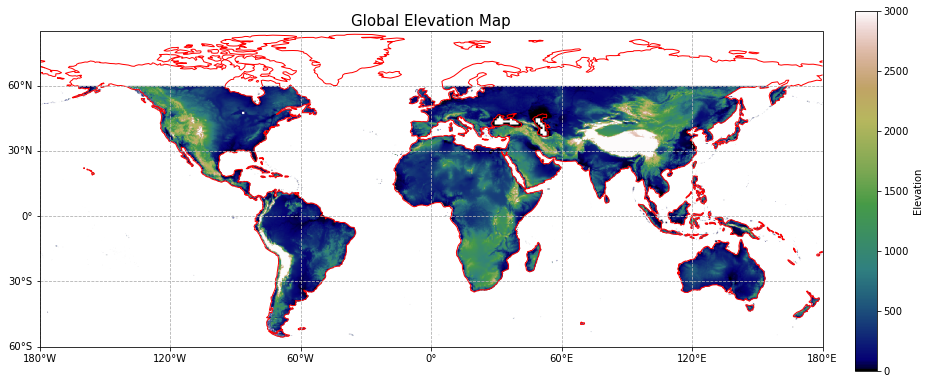

In [6]:
fig = plt.figure(figsize=(15, 10))

cmap = "gist_earth" # colormap we want to use
# cmap = "terrain"

# use cartoee to get a map
ax = cartoee.get_map(srtm, region=region, vis_params=vis, cmap=cmap)

# add a colorbar to the map using the visualization params we passed to the map
cartoee.add_colorbar(ax, vis, cmap=cmap, loc="right", label="Elevation", orientation="vertical")

# add gridlines to the map at a specified interval
cartoee.add_gridlines(ax, interval=[60,30], linestyle="--")

# add coastlines using the cartopy api
ax.coastlines(color="red")

ax.set_title(label = 'Global Elevation Map', fontsize=15)

plt.show()

### Plot an RGB image

In [7]:
# get a landsat image to visualize
image = ee.Image('LANDSAT/LC08/C01/T1_SR/LC08_044034_20140318')

# define the visualization parameters to view
vis ={"bands": ['B5', 'B4', 'B3'], "min": 0, "max":5000, "gamma":1.3}

/Users/bonnymcclain/opt/miniconda3/envs/geo/lib/python3.8/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/10m/physical/ne_10m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


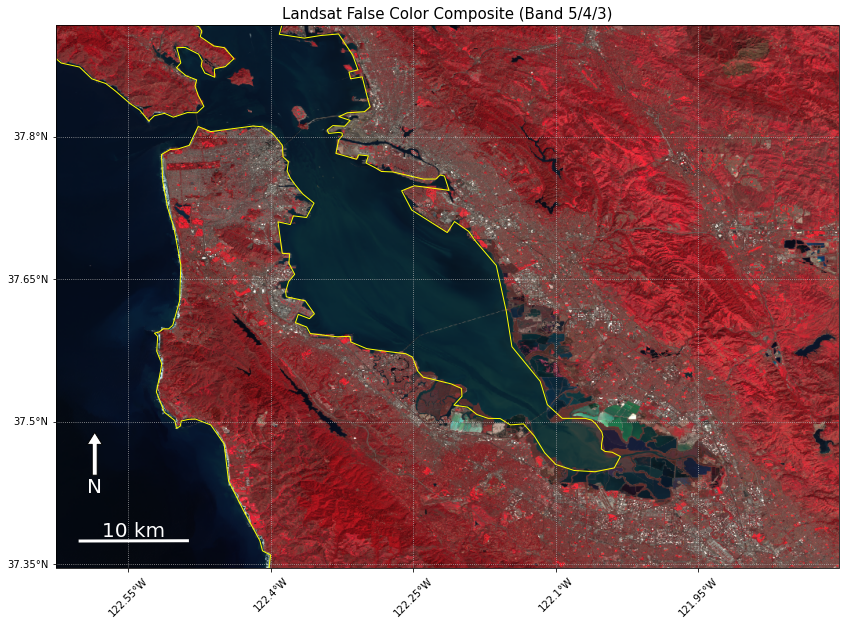

In [8]:
fig = plt.figure(figsize=(15, 10))

# here is the bounding box of the map extent we want to use
# formatted a [W,S,E,N]
zoom_region = [-122.6265, 37.3458, -121.8025, 37.9178]

# plot the map over the region of interest
ax = cartoee.get_map(image, vis_params=vis, region=zoom_region)

# add the gridlines and specify that the xtick labels be rotated 45 degrees
cartoee.add_gridlines(ax, interval=0.15, xtick_rotation=45, linestyle=":")

# add coastline
ax.coastlines(color="yellow")

# add north arrow
cartoee.add_north_arrow(ax, text="N", xy=(0.05, 0.25), text_color="white", arrow_color="white", fontsize=20)

# add scale bar
cartoee.add_scale_bar_lite(ax, length=10, xy=(0.1, 0.05), fontsize=20, color="white", unit="km")

ax.set_title(label = 'Landsat False Color Composite (Band 5/4/3)', fontsize=15)

plt.show()

### Add map elements

In [ ]:
from matplotlib.lines import Line2D

In [ ]:
# get a landsat image to visualize
image = ee.Image('LANDSAT/LC08/C01/T1_SR/LC08_044034_20140318')

# define the visualization parameters to view
vis ={"bands": ['B5', 'B4', 'B3'], "min": 0, "max":5000, "gamma":1.3}

In [ ]:
fig = plt.figure(figsize=(15, 10))

# here is the bounding box of the map extent we want to use
# formatted a [W,S,E,N]
zoom_region = [-122.6265, 37.3458, -121.8025, 37.9178]

# plot the map over the region of interest
ax = cartoee.get_map(image, vis_params=vis, region=zoom_region)

# add the gridlines and specify that the xtick labels be rotated 45 degrees
cartoee.add_gridlines(ax, interval=0.15, xtick_rotation=0, linestyle=":")

# add coastline
ax.coastlines(color="cyan")

# add north arrow
cartoee.add_north_arrow(ax, text="N", xy=(0.05, 0.25), text_color="white", arrow_color="white", fontsize=20)

# add scale bar
cartoee.add_scale_bar_lite(ax, length=10, xy=(0.1, 0.05), fontsize=20, color="white", unit="km")

ax.set_title(label = 'Landsat False Color Composite (Band 5/4/3)', fontsize=15)

# add legend
legend_elements = [Line2D([], [], color='#00ffff', lw=2, label='Coastline'),
    Line2D([], [], marker='o', color='#A8321D', label='City', markerfacecolor='#A8321D', markersize=10, ls ='')]

cartoee.add_legend(ax, legend_elements, loc='lower right')

plt.show()

### Plot multiple layers

In [ ]:
Map = geemap.Map()

image = ee.ImageCollection('MODIS/MCD43A4_006_NDVI') \
                  .filter(ee.Filter.date('2018-04-01', '2018-05-01')) \
                  .select("NDVI")\
                  .first()

vis_params = {
  'min': 0.0,
  'max': 1.0,
  'palette': [
    'FFFFFF', 'CE7E45', 'DF923D', 'F1B555', 'FCD163', '99B718', '74A901',
    '66A000', '529400', '3E8601', '207401', '056201', '004C00', '023B01',
    '012E01', '011D01', '011301'
  ],
}
Map.setCenter(-7.03125, 31.0529339857, 2)
Map.addLayer(image, vis_params, 'MODIS NDVI')

countries = geemap.shp_to_ee("../data/countries.shp")
style = {
    "color": "00000088",
    "width": 1,
    "fillColor": "00000000"}
Map.addLayer(countries.style(**style), {}, "Countires")

ndvi = image.visualize(**vis_params)
blend = ndvi.blend(countries.style(**style))

Map.addLayer(blend, {}, "Blend")

Map

In [ ]:
# specify region to focus on
bbox = [-180, -88, 180, 88]

In [ ]:
fig = plt.figure(figsize=(15,10))

# plot the result with cartoee using a PlateCarre projection (default)
ax = cartoee.get_map(blend,  region=bbox)
cb = cartoee.add_colorbar(ax, vis_params=vis_params, loc='right')

ax.set_title(label = 'MODIS NDVI', fontsize = 15)

# ax.coastlines()
plt.show()

In [ ]:
import cartopy.crs as ccrs

In [ ]:
fig = plt.figure(figsize=(15,10))

projection = ccrs.EqualEarth(central_longitude=-180)

# plot the result with cartoee using a PlateCarre projection (default)
ax = cartoee.get_map(blend,  region=bbox, proj=projection)
cb = cartoee.add_colorbar(ax, vis_params=vis_params, loc='right')

ax.set_title(label = 'MODIS NDVI', fontsize = 15)

# ax.coastlines()
plt.show()

### Use custom projections

In [ ]:
import cartopy.crs as ccrs

In [ ]:
# get an earth engine image of ocean data for Jan-Mar 2018
ocean = (
    ee.ImageCollection('NASA/OCEANDATA/MODIS-Terra/L3SMI')
    .filter(ee.Filter.date('2018-01-01', '2018-03-01'))
    .median()
    .select(["sst"], ["SST"])
)

In [ ]:
# set parameters for plotting
# will plot the Sea Surface Temp with specific range and colormap
visualization = {'bands':"SST", 'min':-2, 'max':30}
# specify region to focus on
bbox = [-180, -88, 180, 88]

In [ ]:
fig = plt.figure(figsize=(15,10))

# plot the result with cartoee using a PlateCarre projection (default)
ax = cartoee.get_map(ocean, cmap='plasma', vis_params=visualization, region=bbox)
cb = cartoee.add_colorbar(ax, vis_params=visualization, loc='right', cmap='plasma')

ax.set_title(label = 'Sea Surface Temperature', fontsize = 15)

ax.coastlines()
plt.show()

In [ ]:
fig = plt.figure(figsize=(15,10))

# create a new Mollweide projection centered on the Pacific
projection = ccrs.Mollweide(central_longitude=-180)

# plot the result with cartoee using the Mollweide projection
ax = cartoee.get_map(ocean, vis_params=visualization, region=bbox,
                cmap='plasma', proj=projection)
cb = cartoee.add_colorbar(ax,vis_params=visualization, loc='bottom', cmap='plasma',
                    orientation='horizontal')

ax.set_title("Mollweide projection")

ax.coastlines()
plt.show()

In [ ]:
fig = plt.figure(figsize=(15,10))

# create a new Robinson projection centered on the Pacific
projection = ccrs.Robinson(central_longitude=-180)

# plot the result with cartoee using the Goode homolosine projection
ax = cartoee.get_map(ocean, vis_params=visualization, region=bbox,
                cmap='plasma', proj=projection)
cb = cartoee.add_colorbar(ax, vis_params=visualization, loc='bottom', cmap='plasma',
                    orientation='horizontal')

ax.set_title("Robinson projection")

ax.coastlines()
plt.show()

In [ ]:
fig = plt.figure(figsize=(15,10))

# create a new equal Earth projection focused on the Pacific
projection = ccrs.EqualEarth(central_longitude=-180)

# plot the result with cartoee using the orographic projection
ax = cartoee.get_map(ocean, vis_params=visualization, region=bbox,
                cmap='plasma', proj=projection)
cb = cartoee.add_colorbar(ax, vis_params=visualization, loc='right', cmap='plasma',
                    orientation='vertical')

ax.set_title("Equal Earth projection")

ax.coastlines()
plt.show()

In [ ]:
fig = plt.figure(figsize=(15,10))

# create a new orographic projection focused on the Pacific
projection = ccrs.Orthographic(-130,-10)

# plot the result with cartoee using the orographic projection
ax = cartoee.get_map(ocean, vis_params=visualization, region=bbox,
                cmap='plasma', proj=projection)
cb = cartoee.add_colorbar(ax, vis_params=visualization, loc='right', cmap='plasma',
                    orientation='vertical')

ax.set_title("Orographic projection")

ax.coastlines()
plt.show()

### Create timelapse animations

In [ ]:
Map = geemap.Map()

lon = -115.1585
lat = 36.1500
start_year = 1984
end_year = 2000

point = ee.Geometry.Point(lon, lat)
years = ee.List.sequence(start_year, end_year)

def get_best_image(year):   

    start_date = ee.Date.fromYMD(year, 1, 1)
    end_date = ee.Date.fromYMD(year, 12, 31)
    image = ee.ImageCollection("LANDSAT/LT05/C01/T1_SR") \
        .filterBounds(point) \
        .filterDate(start_date, end_date) \
        .sort("CLOUD_COVER") \
        .first()    
    return ee.Image(image)

collection = ee.ImageCollection(years.map(get_best_image))

vis_params = {
  "bands": ['B4', 'B3', 'B2'],
  "min": 0,
  "max": 5000
}

image = ee.Image(collection.first())
Map.addLayer(image, vis_params, 'First image')
Map.setCenter(lon, lat, 8)
Map

In [ ]:
w = 0.4
h = 0.3

region = [lon-w, lat-h, lon+w, lat+h]

fig = plt.figure(figsize=(10, 8))

# use cartoee to get a map
ax = cartoee.get_map(image, region=region, vis_params=vis_params)

# add gridlines to the map at a specified interval
cartoee.add_gridlines(ax, interval=[0.2, 0.2], linestyle=":")

# add north arrow
north_arrow_dict = {
    "text": "N",
    "xy": (0.1, 0.3),
    "arrow_length": 0.15,
    "text_color": "white",
    "arrow_color": "white",
    "fontsize": 20,
    "width": 5,
    "headwidth": 15,
    "ha": "center",
    "va": "center"
}
cartoee.add_north_arrow(ax, **north_arrow_dict)

# add scale bar
scale_bar_dict = {
    "length": 10, 
    "xy": (0.1, 0.05), 
    "linewidth": 3,
    "fontsize": 20,
    "color": "white",
    "unit": "km",
    "ha": "center",
    "va": "bottom"    
}
cartoee.add_scale_bar_lite(ax, **scale_bar_dict)

ax.set_title(label = 'Las Vegas, NV', fontsize=15)

plt.show()

In [ ]:
cartoee.get_image_collection_gif(
    ee_ic = collection,
    out_dir = os.path.expanduser("~/Downloads/timelapse"),
    out_gif = "animation.gif",
    vis_params = vis_params,
    region = region,
    fps = 5,
    mp4 = True,
    grid_interval = (0.2, 0.2),
    plot_title = "Las Vegas, NV",
    date_format = 'YYYY-MM-dd',
    fig_size = (10, 8),
    dpi_plot = 100,
    file_format = "png",
    north_arrow_dict = north_arrow_dict,
    scale_bar_dict = scale_bar_dict,
    verbose = True
)

## Data export

### Export ee.Image

In [ ]:
Map = geemap.Map()

image = ee.Image('LE7_TOA_5YEAR/1999_2003')

landsat_vis = {
    'bands': ['B4', 'B3', 'B2'], 
    'gamma': 1.4
}
Map.addLayer(image, landsat_vis, "LE7_TOA_5YEAR/1999_2003", True, 1)

Map

In [ ]:
# Draw any shapes on the map using the Drawing tools before executing this code block
roi = Map.user_roi

if roi is None:
    roi = ee.Geometry.Polygon([[[-115.413031, 35.889467],
    [-115.413031, 36.543157],
    [-114.034328, 36.543157],
    [-114.034328, 35.889467],
    [-115.413031, 35.889467]]])

In [ ]:
# Set output directory
out_dir = os.path.expanduser('~/Downloads')

if not os.path.exists(out_dir):
    os.makedirs(out_dir)

filename = os.path.join(out_dir, 'landsat.tif')

Exporting all bands as one single image

In [ ]:
image = image.clip(roi).unmask()
geemap.ee_export_image(image, filename=filename, scale=90, region=roi, file_per_band=False)

Exporting each band as one image

In [ ]:
geemap.ee_export_image(image, filename=filename, scale=90, region=roi, file_per_band=True)

Export an image to Google Drive¶

In [ ]:
# geemap.ee_export_image_to_drive(image, description='landsat', folder='export', region=roi, scale=30)

### Export ee.ImageCollection

In [ ]:
loc = ee.Geometry.Point(-99.2222, 46.7816)
collection = ee.ImageCollection('USDA/NAIP/DOQQ') \
    .filterBounds(loc) \
    .filterDate('2008-01-01', '2020-01-01') \
    .filter(ee.Filter.listContains("system:band_names", "N"))

In [ ]:
collection.aggregate_array('system:index').getInfo()

In [ ]:
geemap.ee_export_image_collection(collection, out_dir=out_dir)

In [ ]:
# geemap.ee_export_image_collection_to_drive(collection, folder='export', scale=10)

### Extract pixels as a numpy array

In [ ]:
import matplotlib.pyplot as plt

img = ee.Image('LANDSAT/LC08/C01/T1_SR/LC08_038029_20180810') \
  .select(['B4', 'B5', 'B6'])

aoi = ee.Geometry.Polygon(
  [[[-110.8, 44.7],
    [-110.8, 44.6],
    [-110.6, 44.6],
    [-110.6, 44.7]]], None, False)

rgb_img = geemap.ee_to_numpy(img, region=aoi)
print(rgb_img.shape)

In [ ]:
rgb_img_test = (255*((rgb_img[:, :, 0:3] - 100)/3500)).astype('uint8')
plt.imshow(rgb_img_test)
plt.show()

### Export pixel values to points

In [ ]:
Map = geemap.Map()

# Add Earth Engine dataset
dem = ee.Image('USGS/SRTMGL1_003')
landsat7 = ee.Image('LE7_TOA_5YEAR/1999_2003')

# Set visualization parameters.
vis_params = {
  'min': 0,
  'max': 4000,
  'palette': ['006633', 'E5FFCC', '662A00', 'D8D8D8', 'F5F5F5']}

# Add Earth Eninge layers to Map
Map.addLayer(landsat7, {'bands': ['B4', 'B3', 'B2'], 'min': 20, 'max': 200}, 'Landsat 7')
Map.addLayer(dem, vis_params, 'SRTM DEM', True, 1)
Map

**Download sample data**

In [ ]:
work_dir = os.path.expanduser('~/Downloads')
in_shp = os.path.join(work_dir, 'us_cities.shp')
if not os.path.exists(in_shp):
    data_url = 'https://github.com/giswqs/data/raw/main/us/us_cities.zip'
    geemap.download_from_url(data_url, out_dir=work_dir )

In [ ]:
in_fc = geemap.shp_to_ee(in_shp)
Map.addLayer(in_fc, {}, 'Cities')

**Export pixel values as a shapefile**

In [ ]:
out_shp = os.path.join(work_dir, 'dem.shp')
geemap.extract_values_to_points(in_fc, dem, out_shp)

**Export pixel values as a csv**

In [ ]:
out_csv = os.path.join(work_dir, 'landsat.csv')
geemap.extract_values_to_points(in_fc, landsat7, out_csv)

### Export ee.FeatureCollection

In [ ]:
Map = geemap.Map()

fc = ee.FeatureCollection('users/giswqs/public/countries')
Map.addLayer(fc, {}, "Countries")
Map

In [ ]:
out_dir = os.path.expanduser('~/Downloads')
out_shp = os.path.join(out_dir, 'countries.shp')

In [ ]:
geemap.ee_to_shp(fc, filename=out_shp)

In [ ]:
out_csv = os.path.join(out_dir, 'countries.csv')
geemap.ee_export_vector(fc, filename=out_csv)

In [ ]:
out_kml = os.path.join(out_dir, 'countries.kml')
geemap.ee_export_vector(fc, filename=out_kml)

In [ ]:
# geemap.ee_export_vector_to_drive(fc, description="countries", folder="export", file_format="shp")

## Web apps

### Deploy web apps using ngrok

**Steps to deploy an Earth Engine App:**
1. Install ngrok by following the [instruction](https://ngrok.com/download)
3. Download the notebook [71_timelapse.ipynb](https://geemap.org/notebooks/71_timelapse/71_timelapse.ipynb) 
4. Run this from the command line: `voila --no-browser 71_timelapse.ipynb`
5. Run this from the command line: `ngrok http 8866`
6. Copy the link from the ngrok terminal window. The links looks like the following: https://randomstring.ngrok.io
7. Share the link with anyone. 

**Optional steps:**
* To show code cells from you app, run this from the command line: `voila --no-browser --strip_sources=False 71_timelapse.ipynb`
* To protect your app with a password, run this: `ngrok http -auth="username:password" 8866`
* To run python simple http server in the directory, run this:`sudo python -m http.server 80` 

In [ ]:
geemap.show_youtube("https://youtu.be/eRDZBVJcNCk")

### Deploy web apps using Heroku

**Steps to deploy an Earth Engine App:**

- [Sign up](https://signup.heroku.com/) for a free heroku account.
- Follow the [instructions](https://devcenter.heroku.com/articles/getting-started-with-python#set-up) to install [Git](https://git-scm.com/book/en/v2/Getting-Started-Installing-Git) and Heroku Command Line Interface (CLI).
- Authenticate heroku using the `heroku login` command.
- Clone this repository: <https://github.com/giswqs/geemap-heroku>
- Create your own Earth Engine notebook and put it under the `notebooks` directory.
- Add Python dependencies in the `requirements.txt` file if needed.
- Edit the `Procfile` file by replacing `notebooks/geemap.ipynb` with the path to your own notebook.
- Commit changes to the repository by using `git add . && git commit -am "message"`.
- Create a heroku app: `heroku create`
- Run the `config_vars.py` script to extract Earth Engine token from your computer and set it as an environment variable on heroku: `python config_vars.py`
- Deploy your code to heroku: `git push heroku master`
- Open your heroku app: `heroku open`

**Optional steps:**

- To specify a name for your app, use `heroku apps:create example`
- To preview your app locally, use `heroku local web`
- To hide code cells from your app, you can edit the `Procfile` file and set `--strip_sources=True`
- To periodically check for idle kernels, you can edit the `Procfile` file and set `--MappingKernelManager.cull_interval=60 --MappingKernelManager.cull_idle_timeout=120`
- To view information about your running app, use `heroku logs --tail`
- To set an environment variable on heroku, use `heroku config:set NAME=VALUE`
- To view environment variables for your app, use `heroku config`

In [ ]:
geemap.show_youtube("https://youtu.be/nsIjfD83ggA")